### Problem Statement

classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [36]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [9]:
# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv("datasets\\pet_adoption_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.sample(7)

(2007, 13)


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
1950,2450,Dog,Poodle,81,White,Small,22.240802,1,0,17,363,1,1
608,1108,Dog,Poodle,161,White,Large,22.677876,1,0,34,195,0,0
652,1152,Rabbit,Rabbit,99,Gray,Small,20.511951,1,0,36,399,0,0
859,1359,Rabbit,Rabbit,170,White,Large,24.204427,1,0,42,122,0,0
1488,1988,Dog,Poodle,17,White,Small,6.658156,1,0,42,163,0,1
518,1018,Dog,Golden Retriever,147,White,Medium,22.099328,1,0,73,155,0,1
1198,1698,Rabbit,Rabbit,165,Gray,Small,22.374842,1,0,60,324,0,0


In [10]:
df.corr(numeric_only=True)["adoption_likelihood"].sort_values(ascending=False)


adoption_likelihood    1.000000
vaccinated             0.301311
pet_id                 0.049582
weight_kg              0.017601
timein_shelter_days    0.008867
adoption_fee          -0.005486
previous_owner        -0.023065
age_months            -0.202209
health_condition      -0.244061
Name: adoption_likelihood, dtype: float64

In [12]:
print(df.groupby("vaccinated")["adoption_likelihood"].mean())
print(df.groupby("pet_type")["adoption_likelihood"].mean())
print(df.groupby("previous_owner")["adoption_likelihood"].mean())
print(df.groupby("color")["adoption_likelihood"].mean())
print(df.groupby("size")["adoption_likelihood"].mean())


vaccinated
0    0.111667
1    0.420753
Name: adoption_likelihood, dtype: float64
pet_type
Bird      0.301848
Cat       0.287129
Dog       0.463602
Rabbit    0.253550
Name: adoption_likelihood, dtype: float64
previous_owner
0    0.335475
1    0.311881
Name: adoption_likelihood, dtype: float64
color
Black     0.341772
Brown     0.326371
Gray      0.342500
Orange    0.347188
White     0.285714
Name: adoption_likelihood, dtype: float64
size
Large     0.153968
Medium    0.623249
Small     0.176471
Name: adoption_likelihood, dtype: float64


In [5]:
df["breed"].value_counts().head(10)


breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64

In [13]:
# Step 4: Drop the columns that do not add much value to the analysis
df.drop(columns=["pet_id", "timein_shelter_days", "weight_kg", "adoption_fee", "previous_owner", "color"], inplace=True)
df.columns


Index(['pet_type', 'breed', 'age_months', 'size', 'vaccinated',
       'health_condition', 'adoption_likelihood'],
      dtype='object')

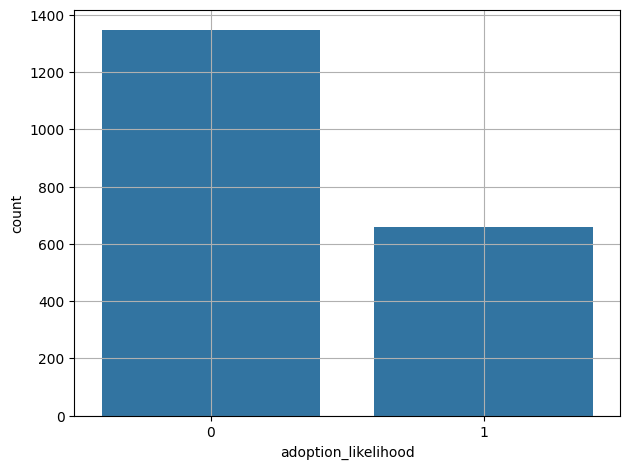

In [18]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
sns.countplot(data=df, x="adoption_likelihood")
plt.grid(True)
plt.tight_layout()
plt.show()

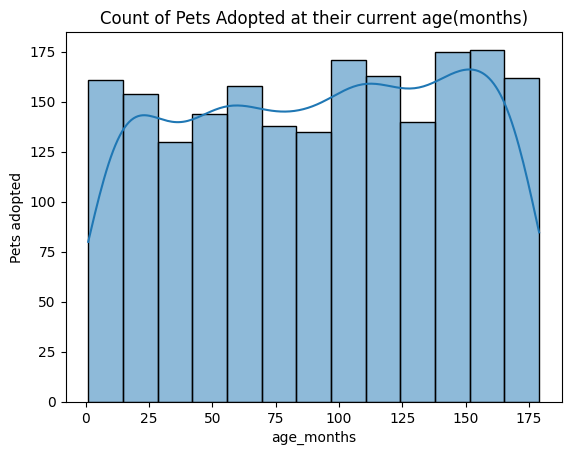

In [23]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
sns.histplot(data=df, x="age_months",kde=True)
plt.title("Count of Pets Adopted at their current age(months)")
plt.ylabel("Pets adopted")
plt.show()

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [26]:
# Step 1: Encode the categorical variables
df["size_number"] = df["size"].map({"Small": 1, "Medium": 2, "Large" :3})
# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).


# Encode 'pet_type' and 'breed' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['pet_type', 'breed'], drop_first=True)
df_encoded.head()

,age_months,size,vaccinated,health_condition,adoption_likelihood,size_number,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,Large,1,0,0,3,False,False,False,False,True,False,False,False,False
1,73,Large,0,0,0,3,False,False,True,False,False,False,False,True,False
2,136,Medium,0,0,0,2,False,True,False,False,False,False,False,False,False
3,97,Small,0,0,0,1,False,False,False,False,True,False,False,False,False
4,123,Large,0,0,0,3,False,False,True,False,False,False,False,True,False


In [27]:
df_encoded.drop(columns=["size"], axis=1, inplace=True)

In [ ]:
X = df_encoded.drop("adoption_likelihood",axis=1)
y = df_encoded["adoption_likelihood"]



In [39]:
df_encoded.head()

,age_months,vaccinated,health_condition,adoption_likelihood,size_number,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,1,0,0,3,False,False,False,False,True,False,False,False,False
1,73,0,0,0,3,False,False,True,False,False,False,False,True,False
2,136,0,0,0,2,False,True,False,False,False,False,False,False,False
3,97,0,0,0,1,False,False,False,False,True,False,False,False,False
4,123,0,0,0,3,False,False,True,False,False,False,False,True,False


### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [42]:
#1. Select the features and the target variable `('adoption_likelihood')` for modeling.
X = df_encoded.drop("adoption_likelihood", axis=1)
y = df_encoded["adoption_likelihood"]
#2. Split the data into training and test sets with a test size of 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Step 3: Initialize and train a Decision Tree Classifier using the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 4: Print the model's accuracy score on the test data
clf_acc = accuracy_score(y_pred=y_pred, y_true=y_test)
print("test accuracy: ",clf_acc)

y_pred_train = clf.predict(X_train)
clf_acc_training = accuracy_score(y_pred=y_pred_train, y_true=y_train)
print("training accuracy: ",clf_acc_training)


test accuracy:  0.8955223880597015
training accuracy:  0.9914529914529915


              precision    recall  f1-score   support

           0       0.94      0.90      0.92       403
           1       0.82      0.89      0.85       200

    accuracy                           0.90       603
   macro avg       0.88      0.89      0.88       603
weighted avg       0.90      0.90      0.90       603



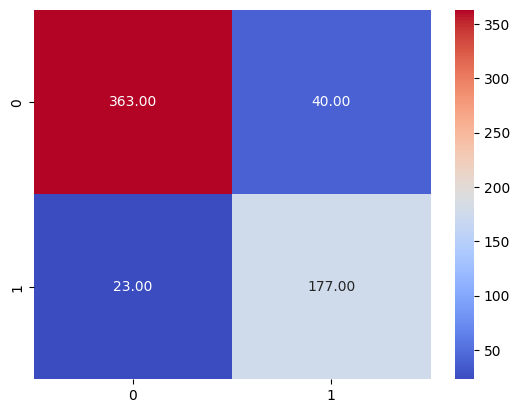

In [44]:

# Step 5: Evaluate the model using a classification report and confusion matrix
conf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_test)
class_report = classification_report(y_pred=y_pred, y_true=y_test)
print(class_report)


sns.heatmap(conf_matrix, fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

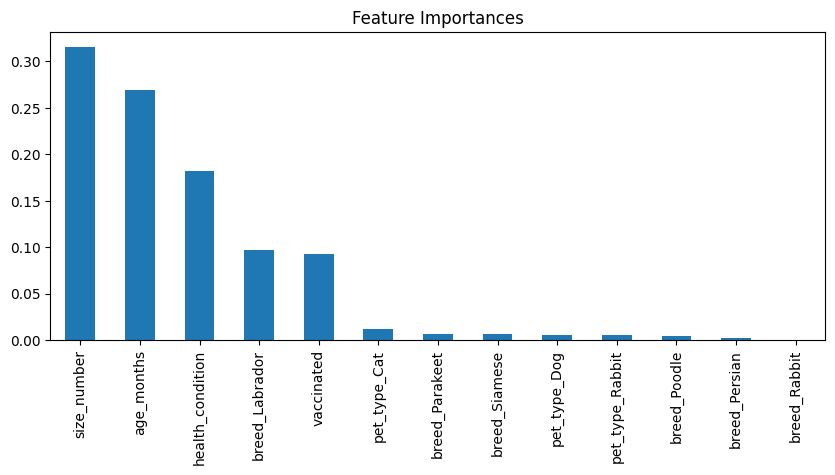

In [53]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title("Feature Importances")
plt.show()

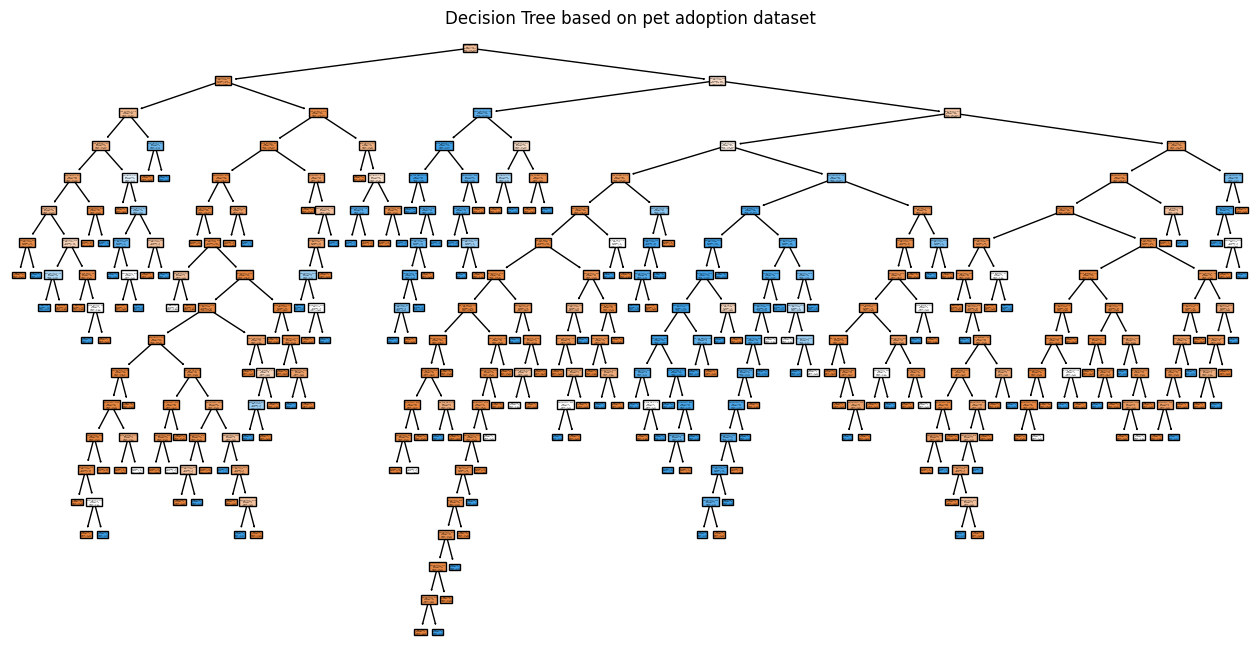

In [57]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Unlikely", "Likely"])
plt.title("Decision Tree based on pet adoption dataset")
plt.show()

### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [45]:
# Step 1: Train the Decision Tree model with specified hyperparameters
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

# Step 2: Print the model's accuracy score on the test data
y_pred_dt = dt.predict(X_test)
dt_acc = accuracy_score(y_pred=y_pred_dt, y_true=y_test)
print("test accuracy: ",dt_acc)

y_pred_dt_train = dt.predict(X_train)
dt_acc_train = accuracy_score(y_pred=y_pred_dt_train, y_true=y_train)
print("training accuracy: ", dt_acc_train)


# Step 3: Evaluate the model using a classification report and confusion matrix
class_rep = classification_report(y_pred=y_pred_dt, y_true=y_test)
conf_m = confusion_matrix(y_pred=y_pred_dt, y_true=y_test)
print(class_rep)

test accuracy:  0.9154228855721394
training accuracy:  0.9188034188034188
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       403
           1       0.91      0.82      0.87       200

    accuracy                           0.92       603
   macro avg       0.91      0.89      0.90       603
weighted avg       0.92      0.92      0.91       603



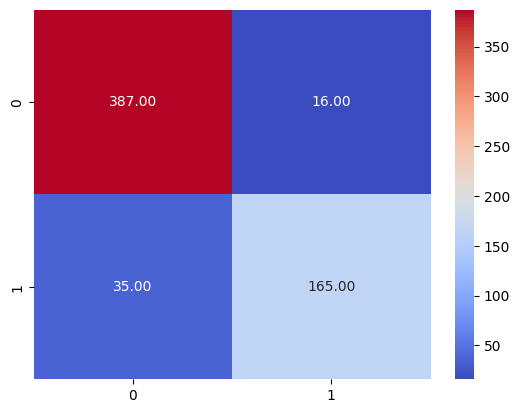

In [47]:
# Step 4: Visualize the confusion matrix
sns.heatmap(conf_m, fmt=".2f", annot=True, cmap="coolwarm")
plt.show()

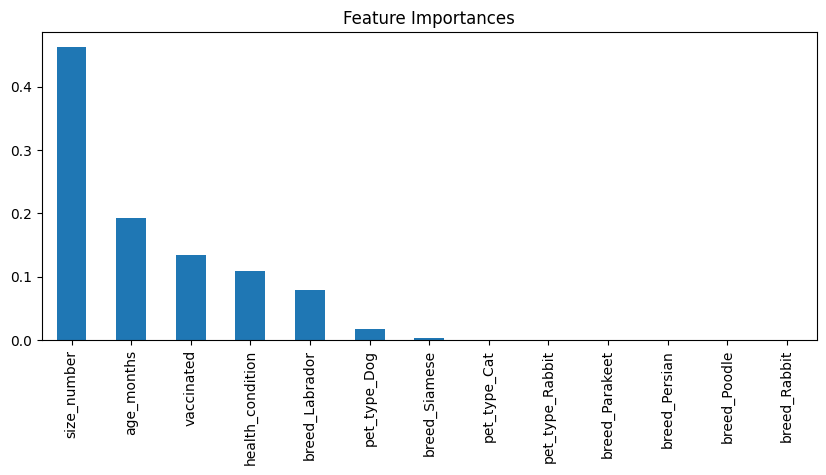

In [54]:
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,4))
plt.title("Feature Importances")
plt.show()

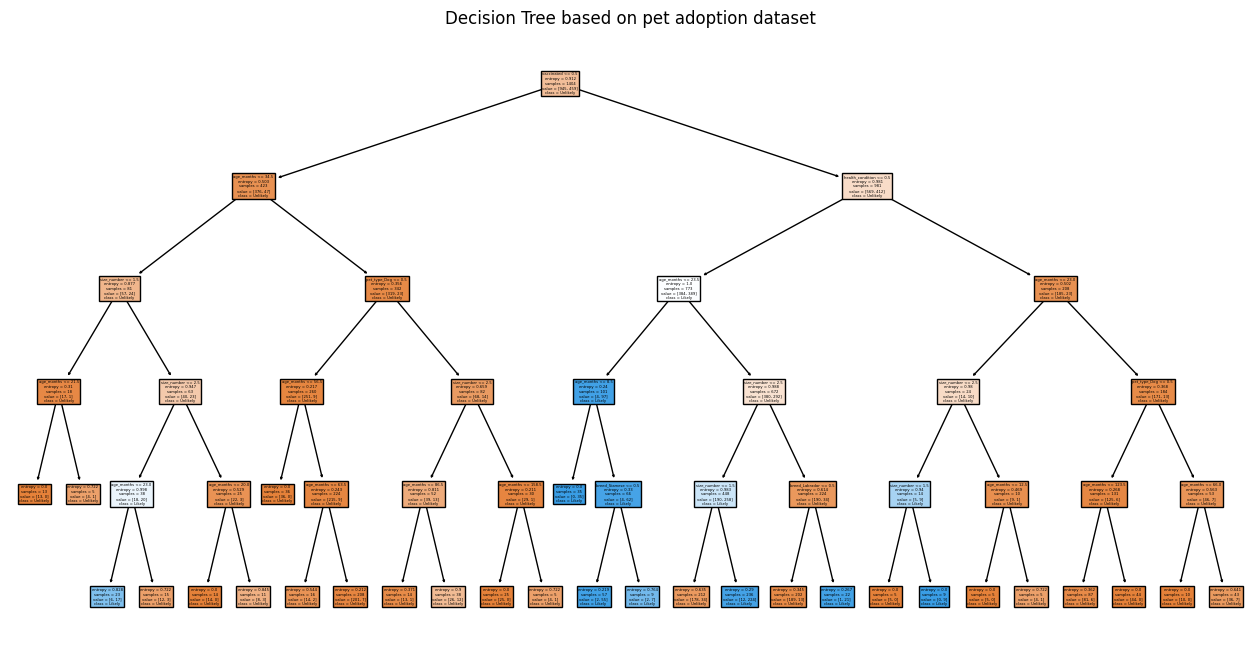

In [ ]:
# Step 5: Visualize the decision tree


plt.figure(figsize=(16,8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["Unlikely", "Likely"])
plt.title("Decision Tree based on pet adoption dataset")
plt.show()

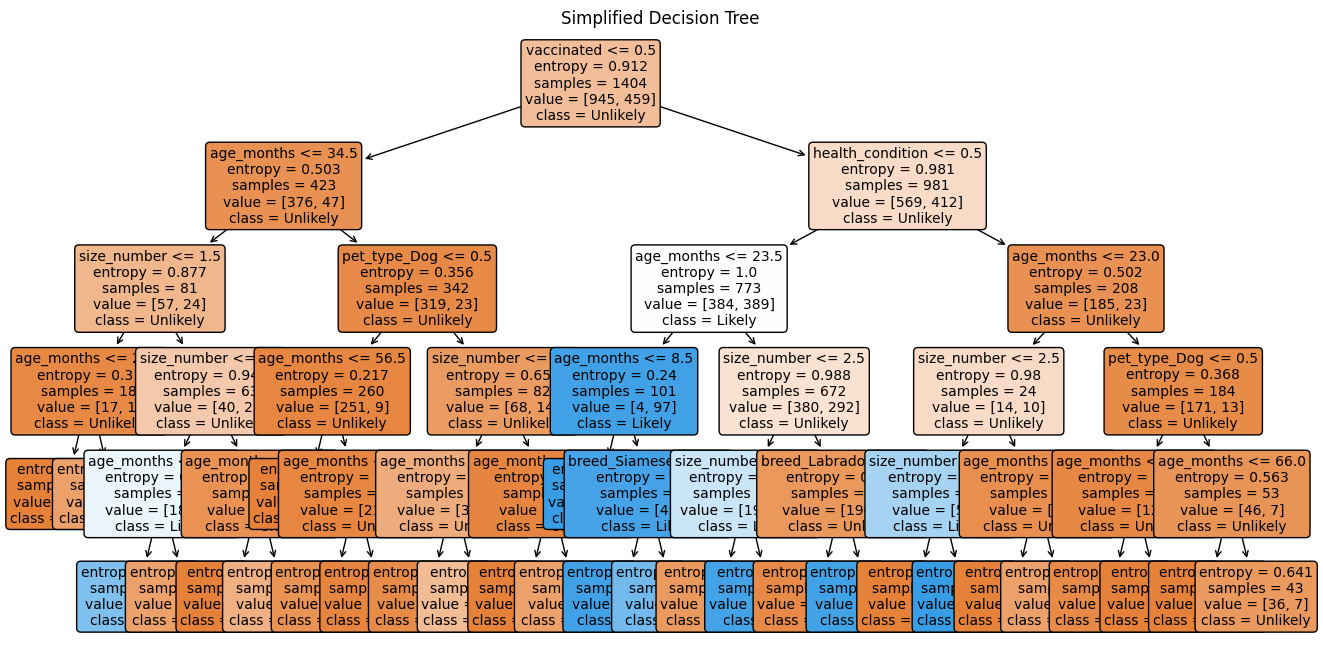

In [55]:
plt.figure(figsize=(16, 8))
plot_tree(
    dt,
    filled=True,
    feature_names=X.columns,       
    class_names=["Unlikely", "Likely"],  
    rounded=True,
    fontsize=10
)
plt.title("Simplified Decision Tree")
plt.show()

### Conclusion

**Decision Tree Classifier (Default Parameters):**
- Accuracy: 0.895
- Provides a good baseline with balanced precision and recall for both classes.

**Custom Decision Tree Classifier (Specified Hyperparameters):**
- Accuracy: 0.915
- Improved performance with better precision, recall, and F1-score for the 'Likely' adoption class.

Tuning hyperparameters significantly enhances the model's predictive power, demonstrating the value of adjusting parameters to capture complex patterns in the data. The decision tree model, especially with fine-tuning, proves to be effective for predicting pet adoption likelihood.